In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
import os
os.chdir('../..')

In [7]:
latest_gw_data = pd.read_parquet('data/processed/latest_gw_data.parquet')
print(latest_gw_data.shape)
latest_gw_data.head()

(1055, 43)


,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,gw,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,name,team_name,promoted_side,top_6_last_season,season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,ID
0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,33117,1,0,0.0,0,0,0,0,5.5,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,474
1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,36709,1,2,0.0,0,-5280,2868,8148,5.5,True,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,474
2,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,7979,1,0,0.0,0,0,0,0,5.5,False,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,203
3,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,8154,1,2,0.0,0,-1652,336,1988,5.5,True,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,203
4,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,93903,1,0,0.0,0,0,0,0,5.5,False,0,sead_kolasinac,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,465


In [14]:
gw2_pred = pd.read_parquet('data/gw_predictions/gw2_v1.1_player_predictions.parquet')
gw2_pred['gw'] = 2
print(gw2_pred.shape)
gw2_pred.head()

(526, 9)


,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value,gw
0,mohamed_salah,0,0,0,1,4.931382,Liverpool,12.5,2
1,anthony_martial,0,0,0,1,4.542306,Manchester United,7.5,2
2,richarlison_de andrade,0,0,0,1,4.530210,Everton,8.0,2
3,nathan_aké,1,0,0,0,4.186734,Bournemouth,5.0,2
4,lucas_digne,1,0,0,0,4.024506,Everton,6.0,2


In [26]:
comparison = latest_gw_data.merge(
    gw2_pred,
    on=['name', 'gw', 'team_name'],
    how='inner'
)

In [58]:
gw2_comparison = comparison[comparison['gw'] == 2]

In [29]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(gw2_comparison['total_points'], gw2_comparison['predictions'])

4.148770544879203

In [60]:
gk = gw2_comparison[gw2_comparison['position_GK_x'] == 1]
defence = gw2_comparison[gw2_comparison['position_DEF_x'] == 1]
fwd = gw2_comparison[gw2_comparison['position_FWD_x'] == 1]
mid = gw2_comparison[gw2_comparison['position_MID_x'] == 1]

In [64]:
print(mean_squared_error(gk['total_points'], gk['predictions']))

print(mean_squared_error(defence['total_points'], defence['predictions']))

print(mean_squared_error(fwd['total_points'], fwd['predictions']))

print(mean_squared_error(mid['total_points'], mid['predictions']))

1.970131618832842
2.8519276451885793
6.285301395897614
5.105064251443427


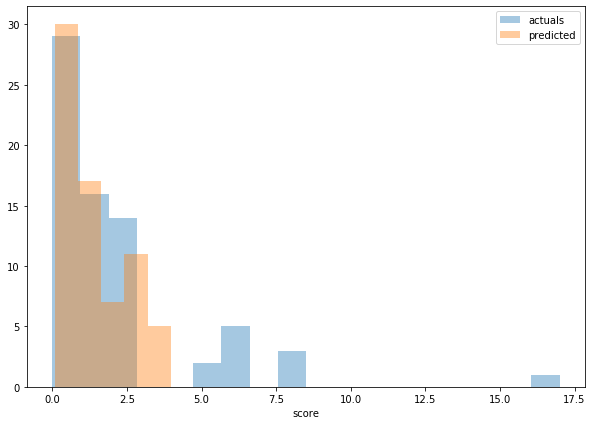

In [67]:
plt.figure(figsize=(10, 7))
sns.distplot(fwd['total_points'], label='actuals', kde=False)
sns.distplot(fwd['predictions'], label='predicted', kde=False)
plt.xlabel('score')
plt.legend()

In [33]:
gw2_comparison.head()

,name,team_name,total_points,predictions
0,shkodran_mustafi,Arsenal,0,0.353646
1,héctor_bellerín,Arsenal,0,0.231508
2,sead_kolasinac,Arsenal,1,0.274709
3,ainsley_maitland-niles,Arsenal,2,2.387855
4,sokratis_papastathopoulos,Arsenal,2,2.766421


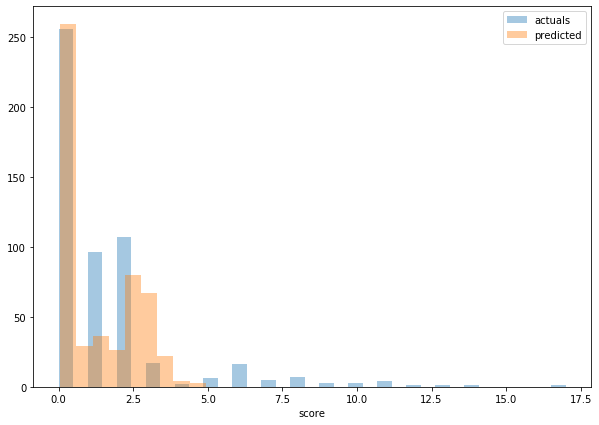

In [54]:
plt.figure(figsize=(10, 7))
sns.distplot(gw2_comparison['total_points'], label='actuals', kde=False)
sns.distplot(gw2_comparison['predictions'], label='predicted', kde=False)
plt.xlabel('score')
plt.legend()

In [57]:
print(f"Max predicted score: {gw2_comparison['predictions'].max()}")
print(f"Max actual score: {gw2_comparison['total_points'].max()}")

Max predicted score: 4.931381841557001
Max actual score: 17


Model is very conservative